# R Stuff and funtions to start up


In [498]:
# install.packages("reticulate")
# library(reticulate)
# use_condaenv("DataScience")

install.packages("sf", type = "binary")
install.packages("rnaturalearth", type = "binary")
install.packages("rnaturalearthdata", type = "binary")

library(tidyverse)
library(sf)
library(rnaturalearth)
library(rnaturalearthdata)

library(dplyr)
library(ggplot2)

printf <- function(...) cat(sprintf(...))

Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}


Warning message:
"Paket 'sf' wird gerade benutzt und deshab nicht installiert"
Warning message:
"Paket 'rnaturalearth' wird gerade benutzt und deshab nicht installiert"
Warning message:
"Paket 'rnaturalearthdata' wird gerade benutzt und deshab nicht installiert"


# Daten laden


In [499]:
df <- read.table("data\\salaries.csv", sep = ",", header = TRUE)
df
mode(df)


work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_residence_country_name,company_location_country_name
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
2023,SE,FT,Software Data Engineer,210000,USD,210000,US,100,US,L,United States,United States
2023,MI,FT,Machine Learning Research Engineer,90000,USD,90000,SA,100,SA,M,Saudi Arabia,Saudi Arabia
2023,MI,FT,Data Analyst,55000,EUR,59401,DE,50,DE,L,Germany,Germany
2023,SE,FT,Analytics Engineer,90000,USD,90000,US,0,US,M,United States,United States
2023,SE,FT,Analytics Engineer,84000,USD,84000,US,0,US,M,United States,United States
2023,SE,FT,Data Analyst,160000,USD,160000,US,100,US,M,United States,United States
2023,SE,FT,Data Analyst,140000,USD,140000,US,100,US,M,United States,United States
2023,SE,FT,Analytics Engineer,221300,USD,221300,US,0,US,M,United States,United States
2023,SE,FT,Analytics Engineer,147500,USD,147500,US,0,US,M,United States,United States


[1] "list"

# Gehalt in USD


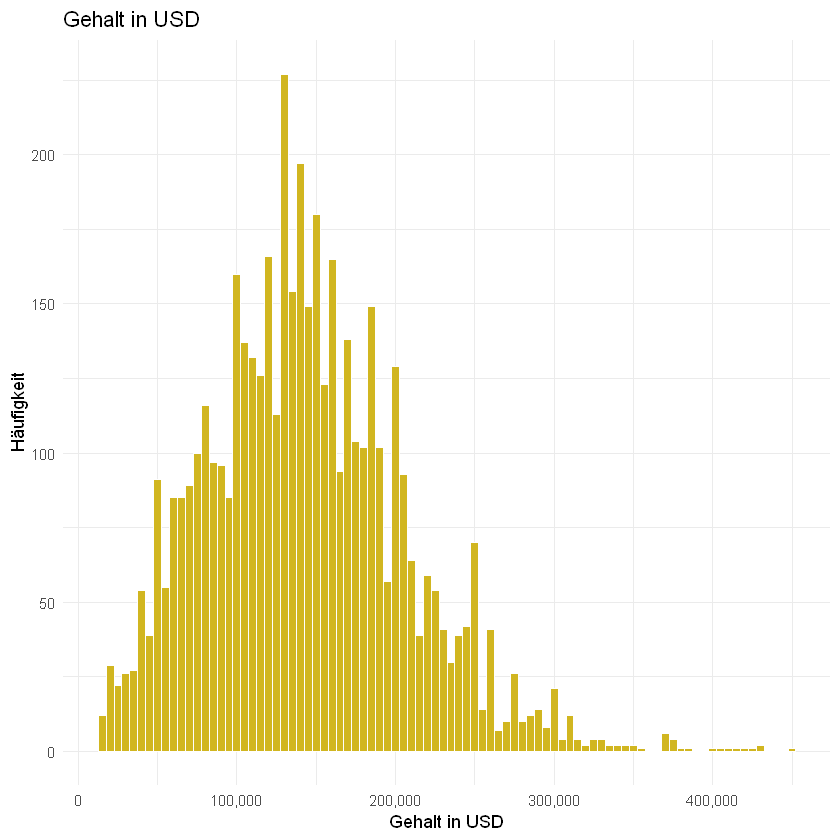

In [500]:
ggplot(data = df, aes(x = salary_in_usd)) +
  geom_histogram(binwidth = 5000, fill = "#d1b620", color = "white") +
  labs(title = "Gehalt in USD", x = "Gehalt in USD", y = "Häufigkeit") +
  scale_x_continuous(labels = scales::comma) +
  theme_minimal()


rechtsschief / linkssteil


In [501]:
print("Zusammenfassung:")
summary(df$salary_in_usd)
print("Standardabweichung:")
sd(df$salary_in_usd)


[1] "Zusammenfassung:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15000  100000  140000  143427  182500  450000 

[1] "Standardabweichung:"


[1] 62667.24

Min: Geringster Wert im Datensatz  
Max: Höchster Wert im Datensatz  
1st Quartil: 25 % Der Werte sind kleiner als 1st Quartil, 75 % der Werte größer  
3rd Quartil: 75 % Der Werte sind kleiner als 1st Quartil, 25 % der Werte größer  
Median (Zentralwert): Der Wert, der genau in der Mitte einer Datenverteilung liegt  
Mean (avg, Durchschnitt, Mittelwert): 2nd Quartil, 50 % Der Werte sind kleiner als 1st Quartil, 50 % der Werte größer  
Standardabweichung: durchschnittliche Abweichung vom Mittelwert

Grobe Erklärung:  
https://de.statista.com/statistik/lexikon/definition/106/quantil/  
https://de.statista.com/statistik/lexikon/definition/91/mittelwert_und_arithmetisches_mittel/


Nach experience_level


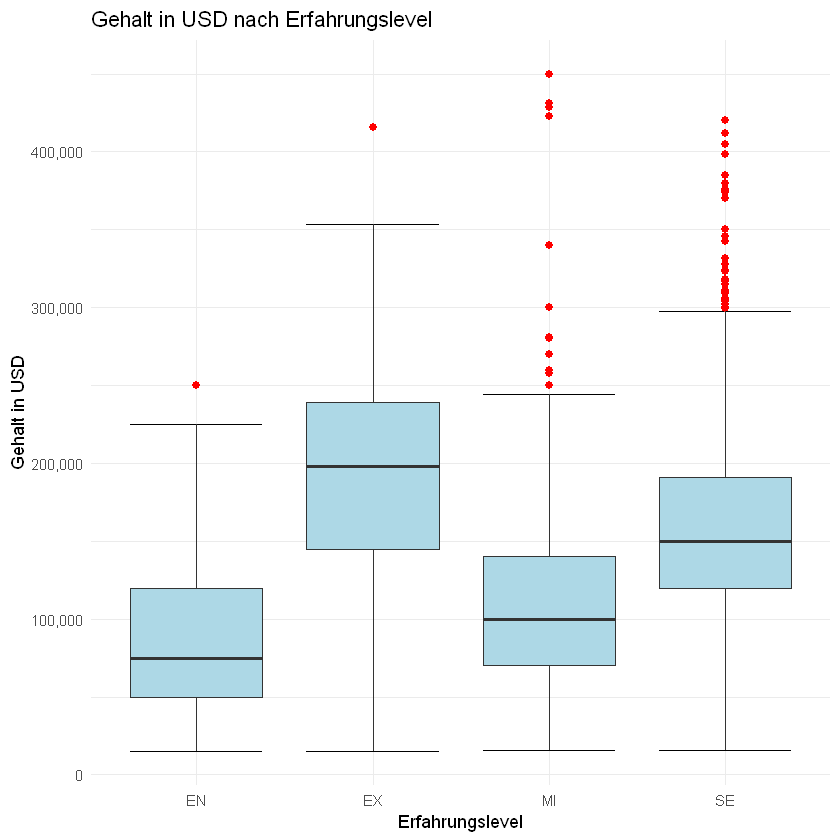

In [502]:
df_ex <- df %>%
  group_by(experience_level)

ggplot(df_ex, aes(x = experience_level, y = salary_in_usd)) +
  stat_boxplot(geom = "errorbar") +
  geom_boxplot(fill = "lightblue", outlier.colour = "red", outlier.size = 2) +
  labs(title = "Gehalt in USD nach Erfahrungslevel", x = "Erfahrungslevel", y = "Gehalt in USD") +
  scale_y_continuous(labels = scales::comma) +
  theme_minimal()


Nach company_location 10 länder mit den meisten unternehmen


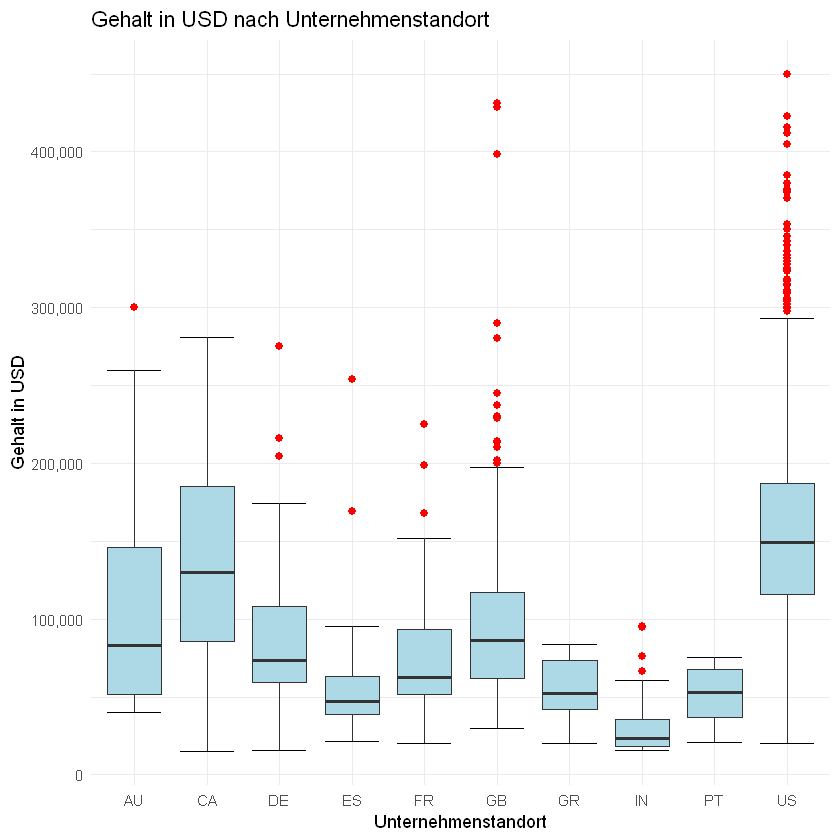

In [503]:
df_top_countries <- df %>%
  group_by(company_location) %>%
  count() %>%
  arrange(desc(n)) %>%
  head(10)

df_counties <- df %>%
  group_by(company_location) %>%
  filter(company_location %in% df_top_countries$company_location)

ggplot(df_counties, aes(x = company_location, y = salary_in_usd)) +
  stat_boxplot(geom = "errorbar") +
  geom_boxplot(fill = "lightblue", outlier.colour = "red", outlier.size = 2) +
  labs(title = "Gehalt in USD nach Unternehmenstandort", x = "Unternehmenstandort", y = "Gehalt in USD") +
  scale_y_continuous(labels = scales::comma) +
  theme_minimal()


Nach company_size


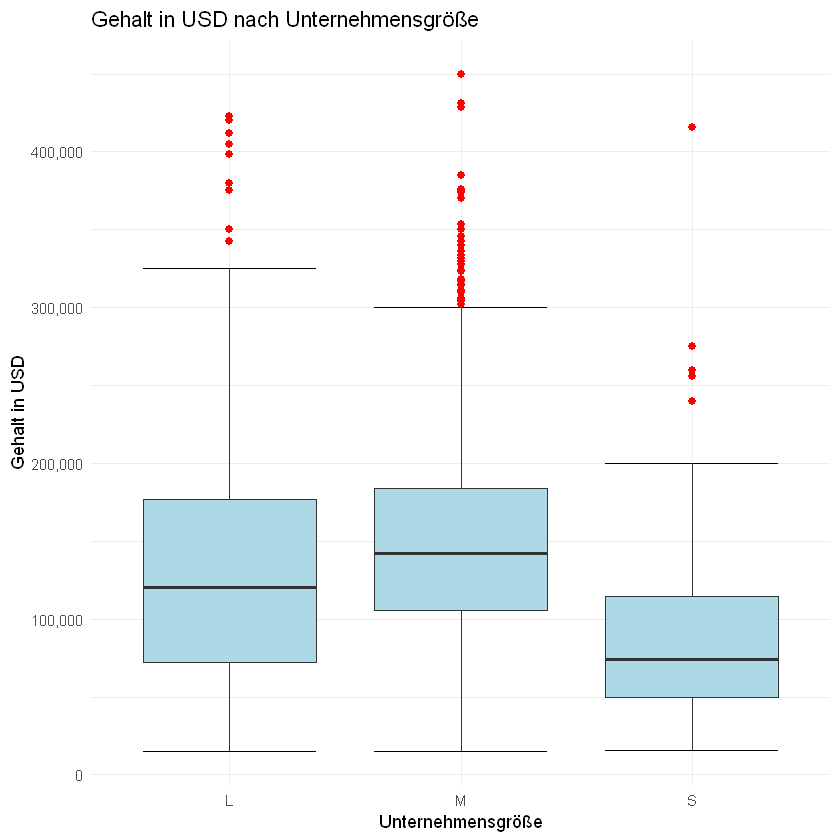

In [504]:
df_cz <- df %>%
  group_by(company_size)

ggplot(df_cz, aes(x = company_size, y = salary_in_usd)) +
  stat_boxplot(geom = "errorbar") +
  geom_boxplot(fill = "lightblue", outlier.colour = "red", outlier.size = 2) +
  labs(title = "Gehalt in USD nach Unternehmensgröße", x = "Unternehmensgröße", y = "Gehalt in USD") +
  scale_y_continuous(labels = scales::comma) +
  theme_minimal()


Spearman Correlation


# Work Year


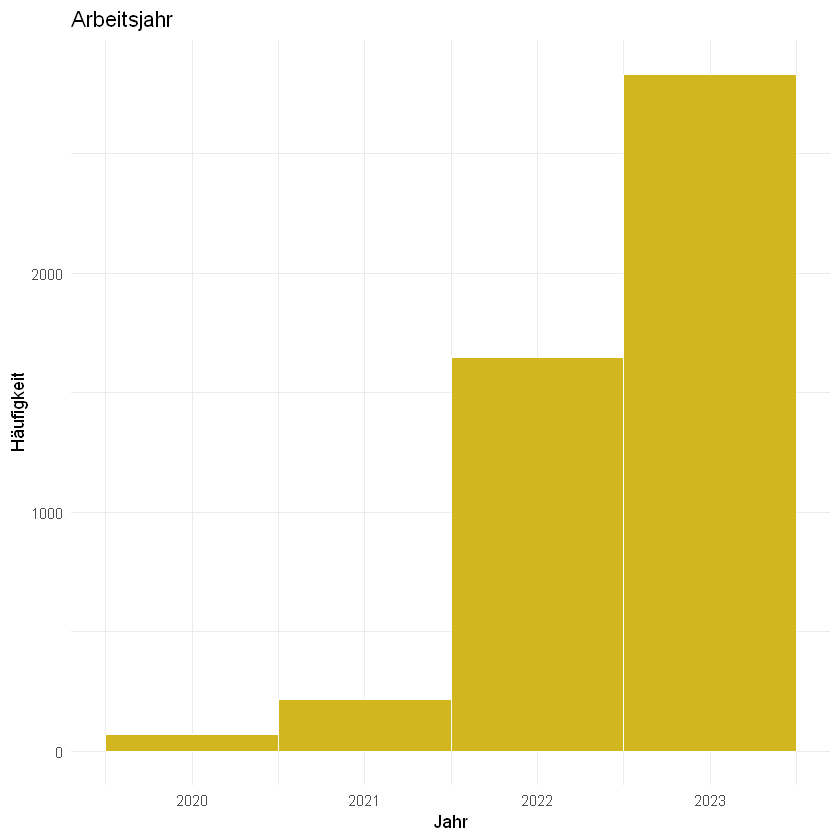

In [505]:
ggplot(data = df, aes(x = work_year)) +
  geom_histogram(binwidth = 1, fill = "#d1b620", color = "white") +
  labs(title = "Arbeitsjahr", x = "Jahr", y = "Häufigkeit") +
  theme_minimal()


In [506]:
print("Zusammenfassung:")
summary(df$work_year)
print("Standardabweichung:")
sd(df$work_year)


[1] "Zusammenfassung:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2020    2022    2023    2023    2023    2023 

[1] "Standardabweichung:"


[1] 0.6549009

# employee_residence


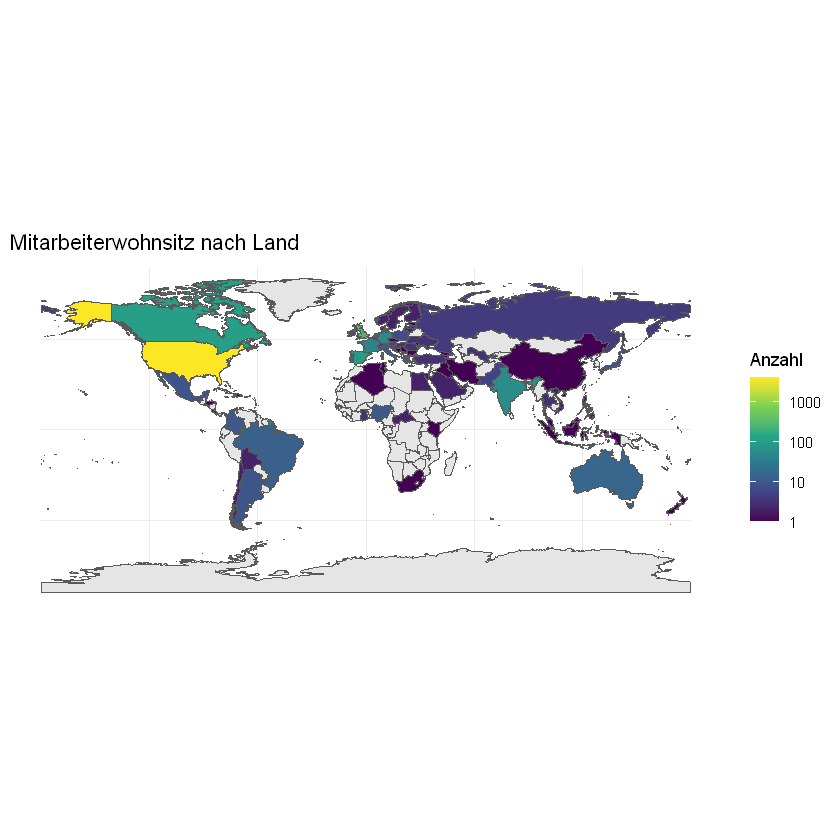

In [507]:
world <- ne_countries(scale = "medium", returnclass = "sf")
agg_emp_data <- df %>%
    group_by(employee_residence) %>%
    summarise(emp_count = n())

# Join employee data with world map data
world_with_emp_data <- world %>%
    left_join(agg_emp_data, by = c("iso_a2" = "employee_residence"))

ggplot(data = world_with_emp_data) +
    geom_sf(aes(fill = emp_count)) +
    scale_fill_viridis_c(
        option = "viridis", trans = "log10",
        na.value = "gray90", guide = guide_colorbar(title = "Anzahl")
    ) +
    labs(title = "Mitarbeiterwohnsitz nach Land") +
    theme_minimal()


In [508]:
m <- Mode(df$employee_residence_country_name)
printf("Mode: %s\n", m)


Mode: United States


# company_location


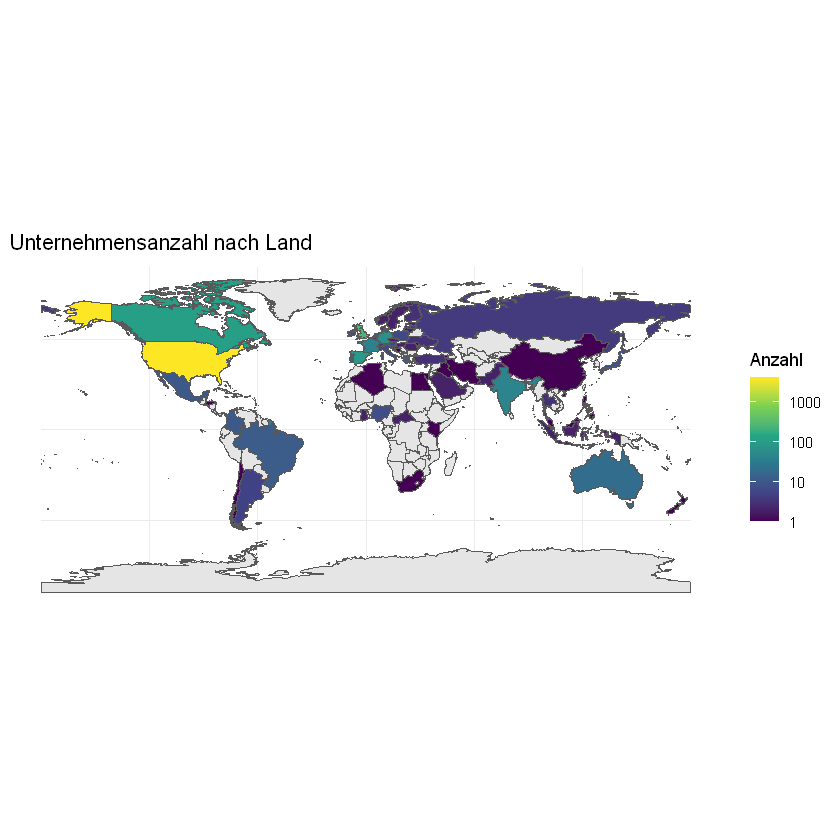

In [509]:
agg_company_data <- df %>%
    group_by(company_location) %>%
    summarise(comp_count = n())

# Join employee data with world map data
world_with_company_data <- world %>%
    left_join(agg_company_data, by = c("iso_a2" = "company_location"))

ggplot(data = world_with_company_data) +
    geom_sf(aes(fill = comp_count)) +
    scale_fill_viridis_c(
        option = "viridis", trans = "log10",
        na.value = "gray90", guide = guide_colorbar(title = "Anzahl")
    ) +
    labs(title = "Unternehmensanzahl nach Land") +
    theme_minimal()


In [510]:
m <- Mode(df$company_location_country_name)
printf("Mode: %s\n", m)


Mode: United States


# Experience Level


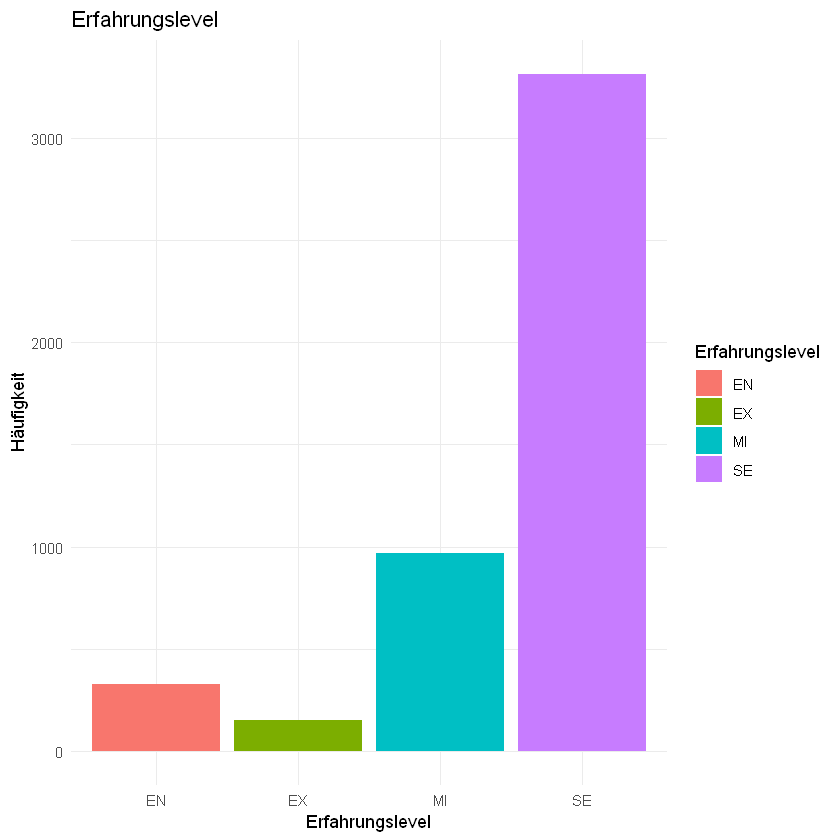

In [511]:
ggplot(data = df, aes(x = experience_level, fill = experience_level)) +
  geom_bar() +
  labs(title = "Erfahrungslevel", x = "Erfahrungslevel", y = "Häufigkeit", fill = "Erfahrungslevel") +
  theme_minimal()


In [512]:
m <- Mode(df$experience_level)
printf("Mode: %s\n", m)


Mode: SE


# employment_type


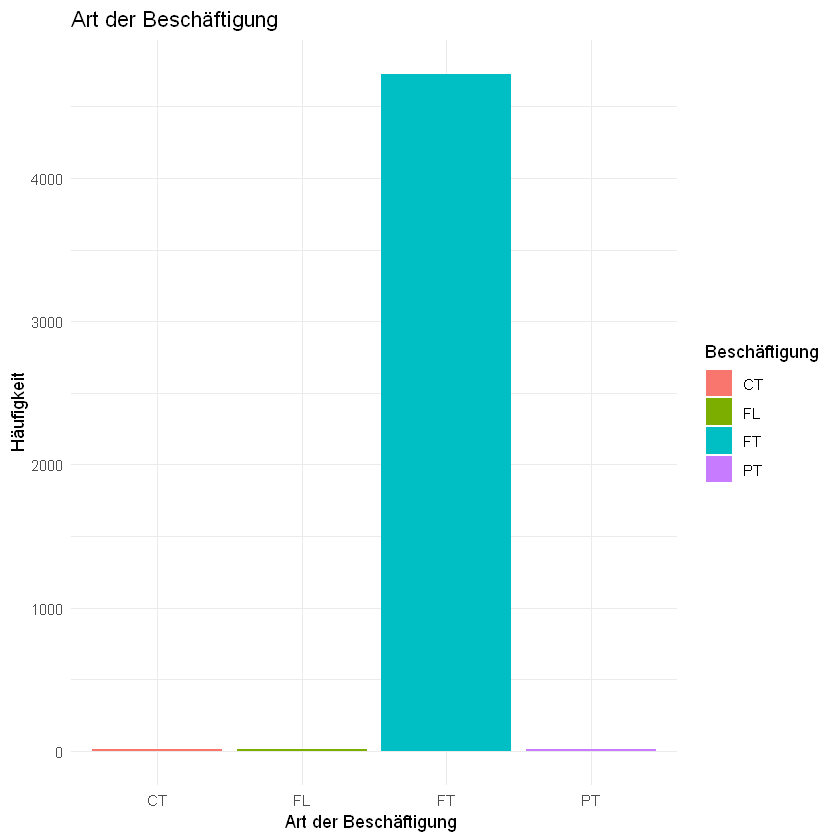

In [513]:
ggplot(data = df, aes(x = employment_type, fill = employment_type)) +
  geom_bar() +
  labs(title = "Art der Beschäftigung", x = "Art der Beschäftigung ", y = "Häufigkeit", fill = "Beschäftigung") +
  theme_minimal()


In [514]:
m <- Mode(df$employment_type)
printf("Mode: %s\n", m)


Mode: FT


# company_size


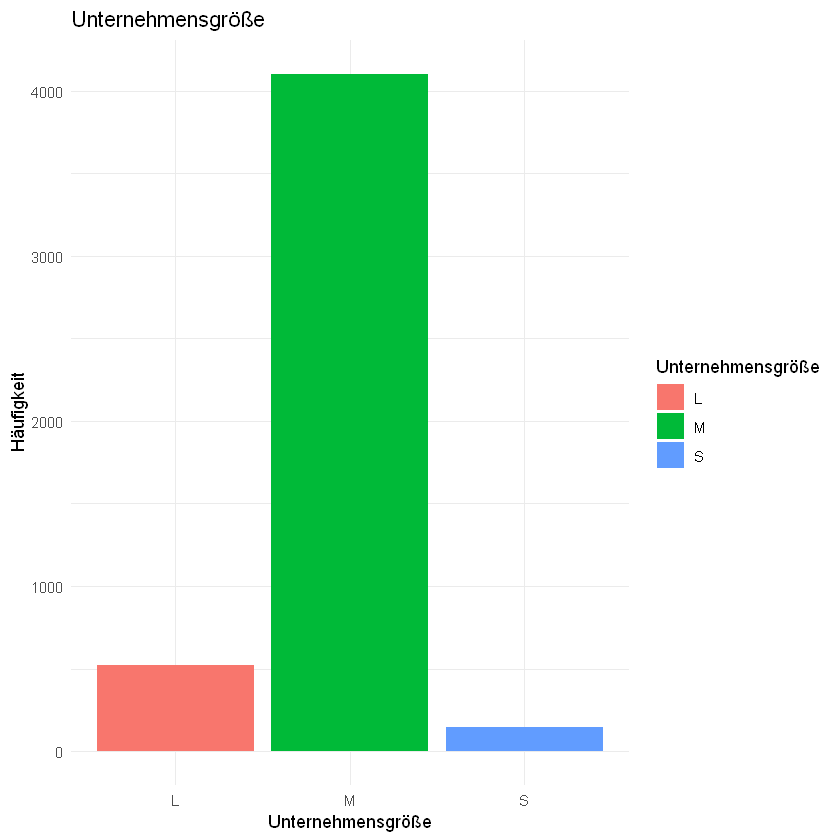

In [515]:
ggplot(data = df, aes(x = company_size, fill = company_size)) +
  geom_bar() +
  labs(title = "Unternehmensgröße", x = "Unternehmensgröße", y = "Häufigkeit", fill = "Unternehmensgröße") +
  theme_minimal()


In [516]:
m <- Mode(df$company_size)
printf("Mode: %s\n", m)


Mode: M


# Korrelationen

[Skalen](https://wissenschafts-thurm.de/wp-content/uploads/2016/09/Skalenniveaus.jpg)

muss in zahlen ausdrückbar sein


In [517]:
newdf <- df %>% select(where(is.numeric))


Pearson's correlation between salary and work_year (nicht gut für Skalen Kardinalskala, wie hier!)

salary_in_usd ist verhältnis, work_year ordninal

Intervall: -1 < r < 1
[-1 (Antikorrelation), 1 (Korrelation)]


In [518]:
correlation <- cor(df$salary_in_usd, df$work_year)
correlation


[1] 0.2172535

Calculate Spearman's rank correlation between remote_ratio and salary

Intervall: -1 < r < 1
[-1 (Antikorrelation), 1 (Korrelation)]


In [519]:
correlation <- cor(df$salary_in_usd, df$work_year, method = "spearman")
correlation


[1] 0.204063

Pearson Correlation


In [520]:
cor(newdf)


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.00000000,-0.092195886,0.217253523,-0.21299049
salary,-0.09219589,1.000000000,-0.004254672,0.02551045
salary_in_usd,0.21725352,-0.004254672,1.000000000,-0.07687290
remote_ratio,-0.21299049,0.025510451,-0.076872897,1.00000000


In [521]:
cor(newdf, method = "spearman")


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.0000000,0.15960528,0.20406301,-0.22426536
salary,0.1596053,1.00000000,0.92301437,-0.04436938
salary_in_usd,0.2040630,0.92301437,1.00000000,-0.07305041
remote_ratio,-0.2242654,-0.04436938,-0.07305041,1.00000000


# Regression


# Anderes


In [522]:
df_summary <- df %>%
  group_by(experience_level) %>%
  summarize(mean_salary = mean(salary), median_salary = median(salary)) %>%
  gather(key = "statistic", value = "value", mean_salary, median_salary)
df_summary


experience_level,statistic,value
<chr>,<chr>,<dbl>
EN,mean_salary,194632.1
EX,mean_salary,239449.3
MI,mean_salary,226226.7
SE,mean_salary,169895.5
EN,median_salary,80500.0
EX,median_salary,200000.0
MI,median_salary,102500.0
SE,median_salary,150000.0


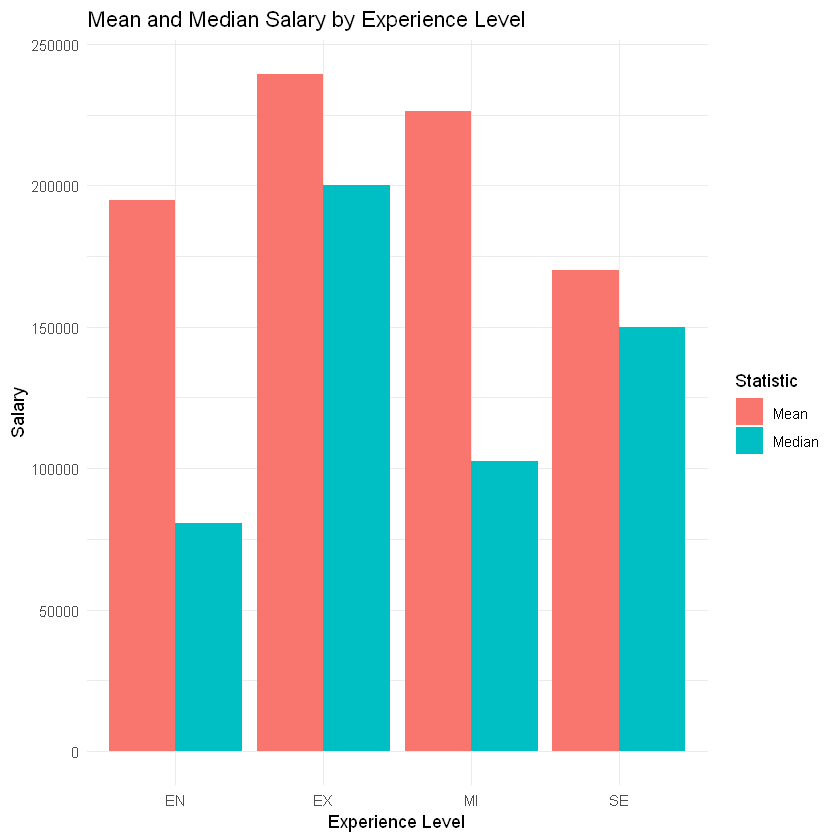

In [523]:
ggplot(data = df_summary, aes(x = experience_level, y = value, fill = statistic)) +
    geom_bar(stat = "identity", position = "dodge") +
    theme_minimal() +
    labs(y = "Salary", x = "Experience Level", title = "Mean and Median Salary by Experience Level") +
    scale_fill_discrete(name = "Statistic", labels = c("Mean", "Median"))


In [524]:
chisq.test(df$work_year, df$company_size, simulate.p.value = TRUE)



	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  df$work_year and df$company_size
X-squared = 1140.4, df = NA, p-value = 0.0004998
